<a href="https://colab.research.google.com/github/wajeehasadaf/Project6220/blob/main/Copy_of_Fruits_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==3.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
datefruit = pd.read_csv('/content/fruits.csv')

In [ ]:
datefruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
X = datefruit.iloc[:,0:7]
X.head(10)

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,EQDIASQ,Class
0,1427.5811,515.6693,354.6234,427.2253,0
1,1671.4170,615.8516,403.3667,497.3849,0
2,1503.5980,546.4366,361.8018,443.1601,0
3,1463.5551,544.9724,361.5594,443.4745,0
4,1403.3560,542.0650,326.1642,419.5720,0
5,1467.7220,573.7374,333.2054,436.7935,0
6,1569.0680,587.9650,367.5672,464.0740,0
7,1530.7870,564.7152,362.0923,451.0723,0
8,1487.1000,534.5702,393.8198,457.7480,0
9,1426.8580,535.9053,345.1051,429.6369,0


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PERIMETER,226.0,2014.929916,471.784851,1039.9240,1490.169425,2218.7655,2404.347500,2722.6831
MAJOR_AXIS,226.0,738.401882,169.105237,372.3486,561.871275,805.6795,876.810050,1036.5886
MINOR_AXIS,226.0,469.617240,110.372510,270.6614,358.065075,487.8538,560.343200,679.2316
EQDIASQ,226.0,584.559966,127.802238,288.9840,443.852850,639.1652,686.997175,779.2183
Class,226.0,0.991150,0.843227,0.0000,0.000000,1.0000,2.000000,2.0000


In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:
y = datefruit['Class']
target = datefruit['Class'].to_numpy()

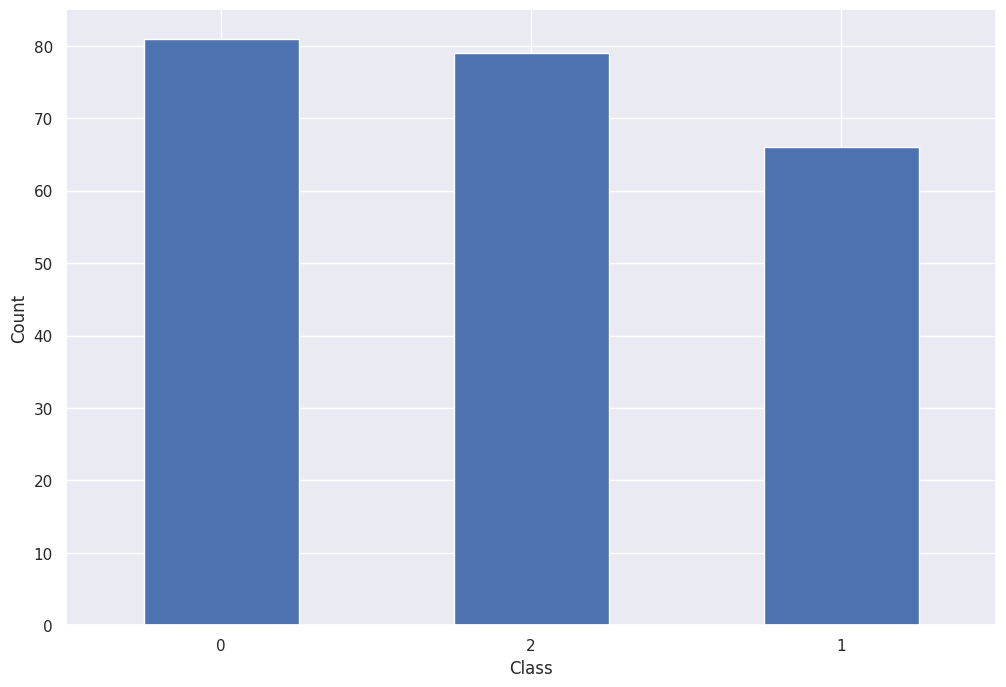

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<ipython-input-10-7c0bd974d1c4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=20);


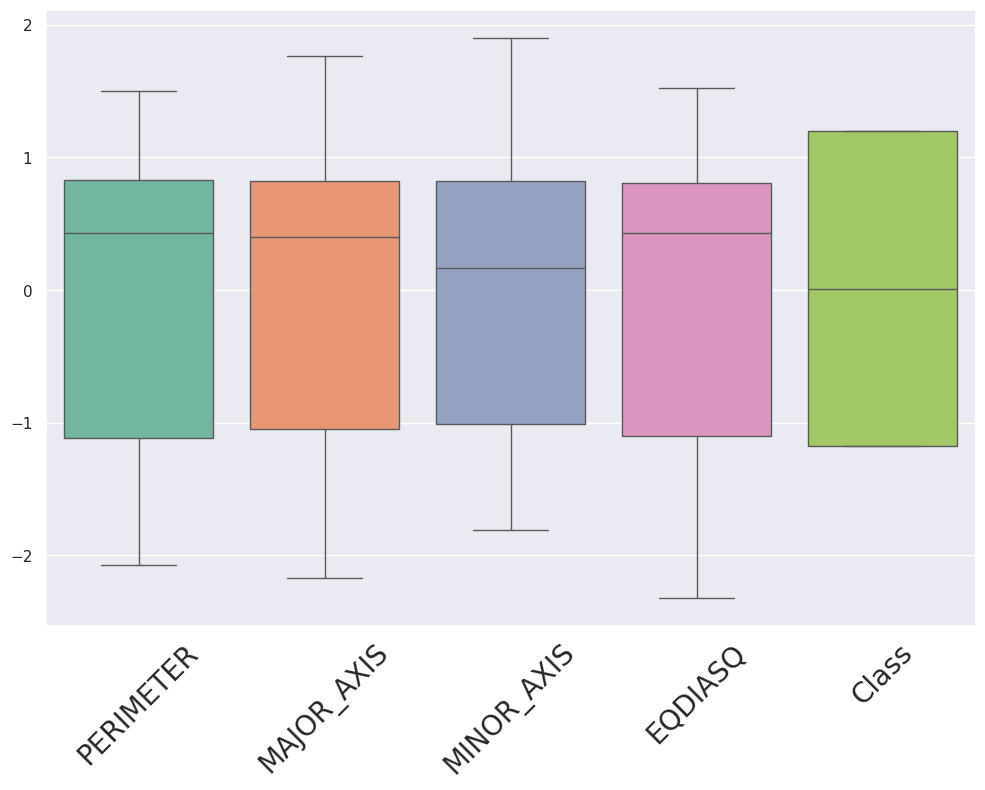

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=20);

<ipython-input-11-421a9823cb28>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


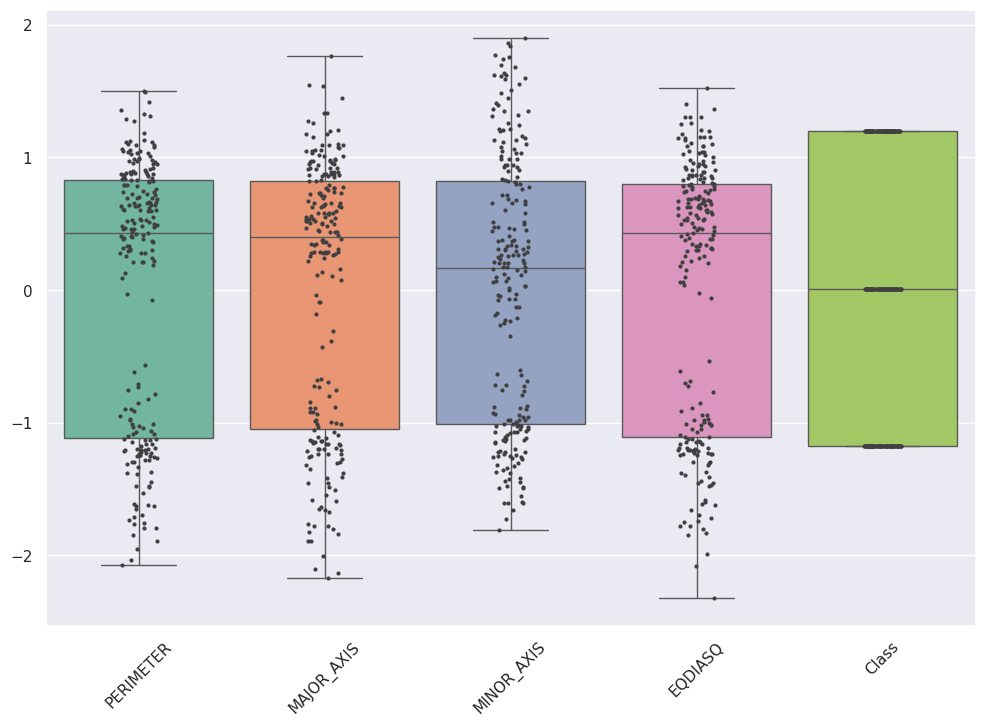

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25", size = 3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

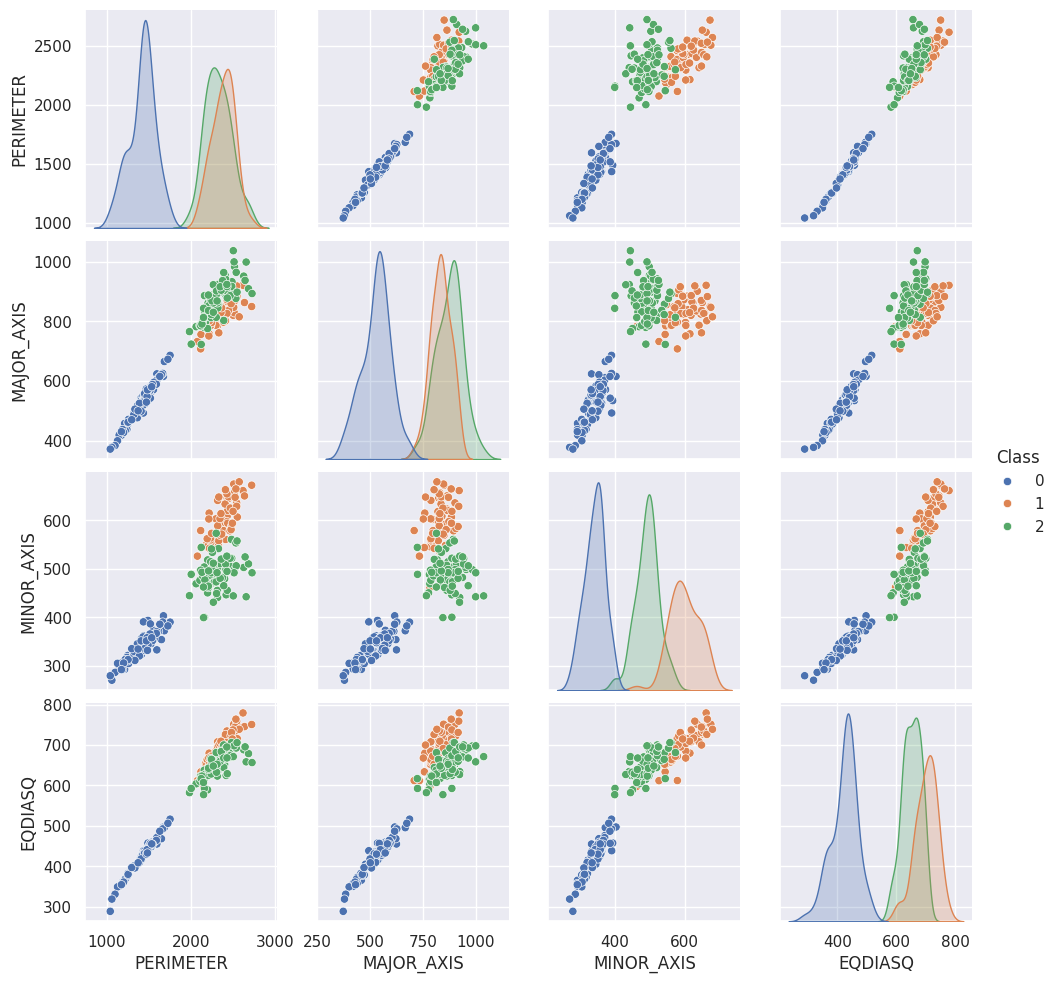

In [ ]:
sns.pairplot(datefruit, hue='Class', palette="deep")
plt.show()

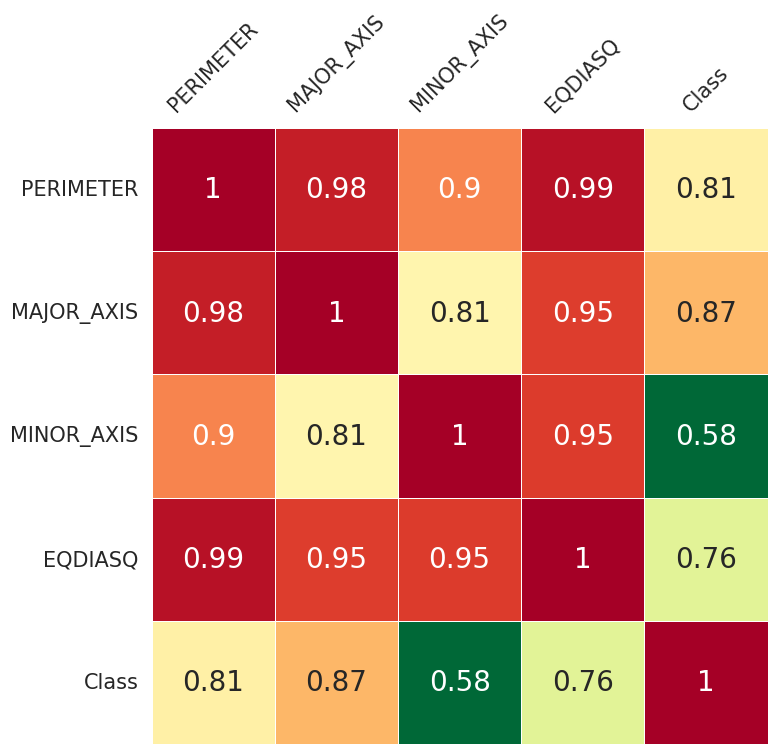

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True, annot_kws=dict(size=20))
plt.yticks(rotation=0, size=15)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, size=15);
#plt.title('Covariance matrix')

Z:
[[ 2.69672115 -0.15657266  0.04439046  0.02870213 -0.00872345]
 [ 1.73097726 -0.46211622 -0.25886396 -0.00952129 -0.00961853]
 [ 2.44988185 -0.19859762 -0.08341826  0.04088758 -0.0053468 ]
 ...
 [-1.78560942  0.75916202 -0.16080732  0.04104273  0.00884559]
 [-2.0244854   0.55070733 -0.05128406 -0.07964146 -0.0131189 ]
 [-2.27348997  0.54686119 -0.22629707  0.27470605 -0.01008068]]


Text(0, 0.5, '$Z_2$')

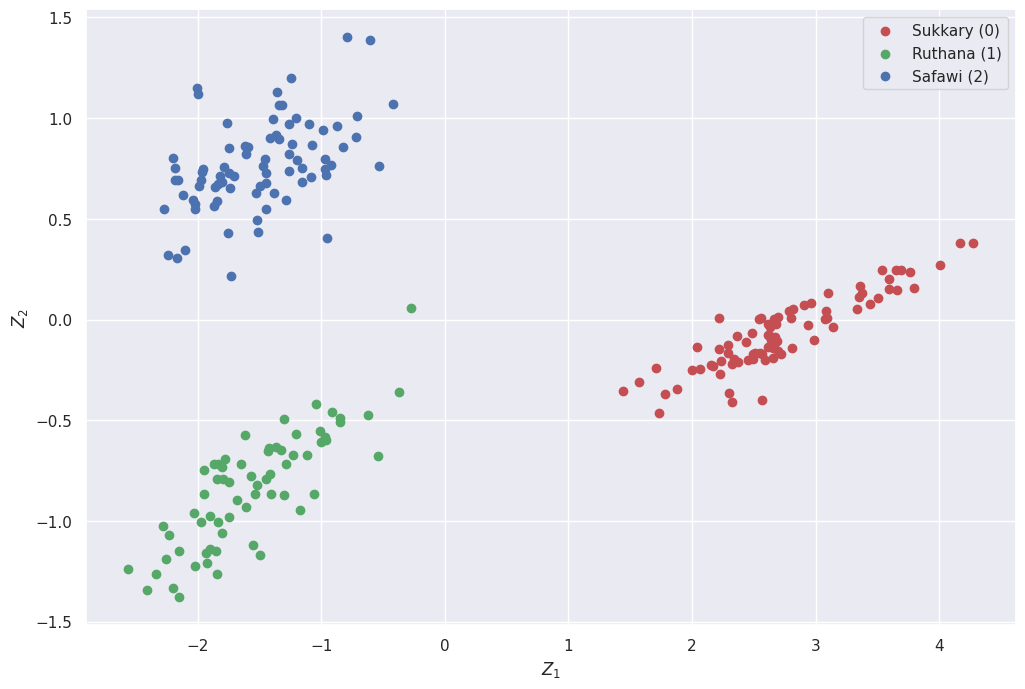

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
print('Z:')
print(Z)

# Sukkary->0,  Ruthana->1, Safawi->2
idx_Sukkary = np.where(y == 0)
idx_Ruthana = np.where(y == 1)
idx_Safawi = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

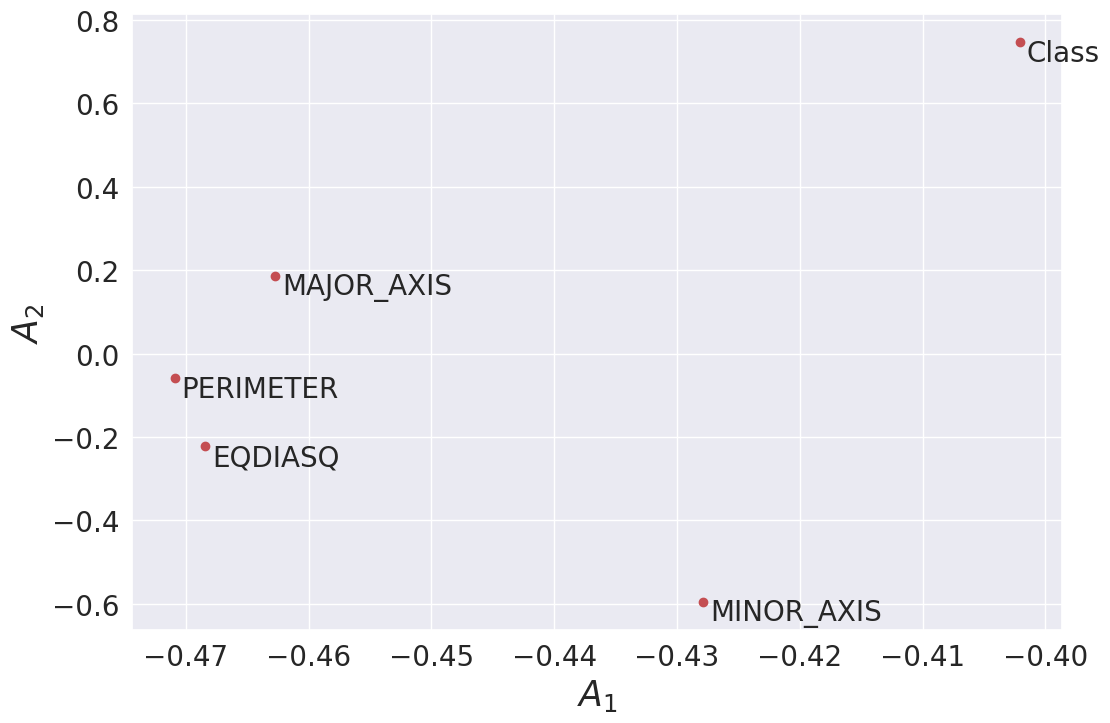

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

A = pca.components_.T
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('$A_1$', size=25)
plt.ylabel('$A_2$', size=25)
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='left', va='bottom', size=20)
        continue
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='left', va='top', size=20)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


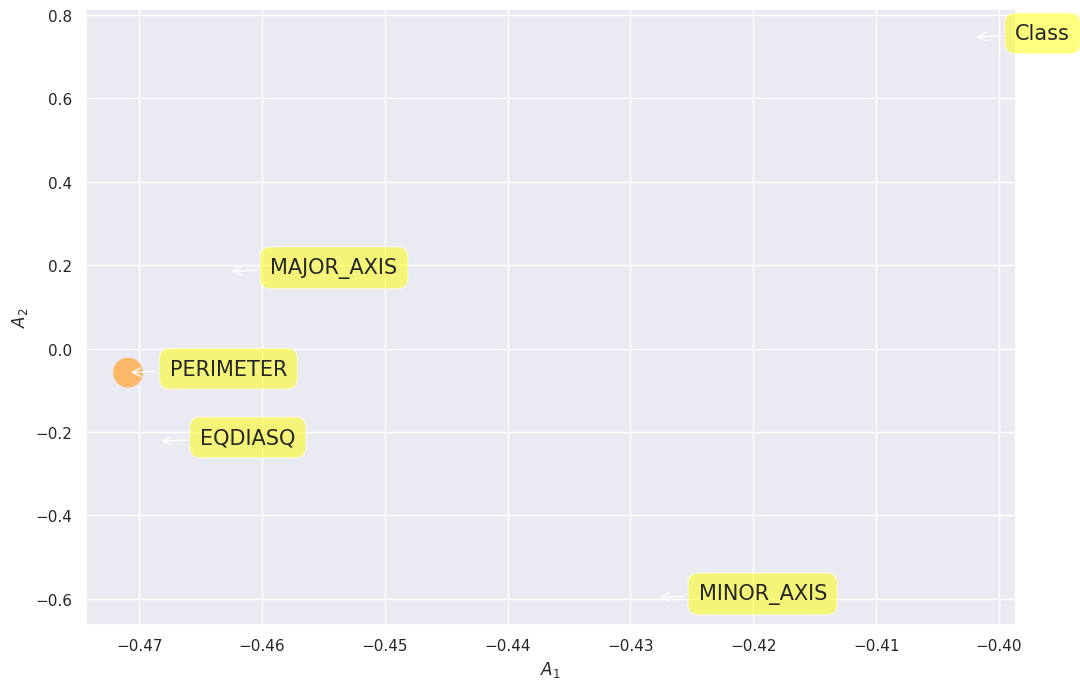

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    if label == 'CONVEX_AREA':
        plt.annotate(label,xy=(x, y), xytext=(-20, 20),
                     textcoords='offset points', ha='left', va='bottom', size=15,
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        continue
    plt.annotate(label,xy=(x, y), xytext=(30, 10),
      textcoords='offset points', ha='left', va='top', size=15,
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Eigenvalues:
[4.46395908e+00 4.67201099e-01 7.94489924e-02 1.10123173e-02
 6.00735620e-04]


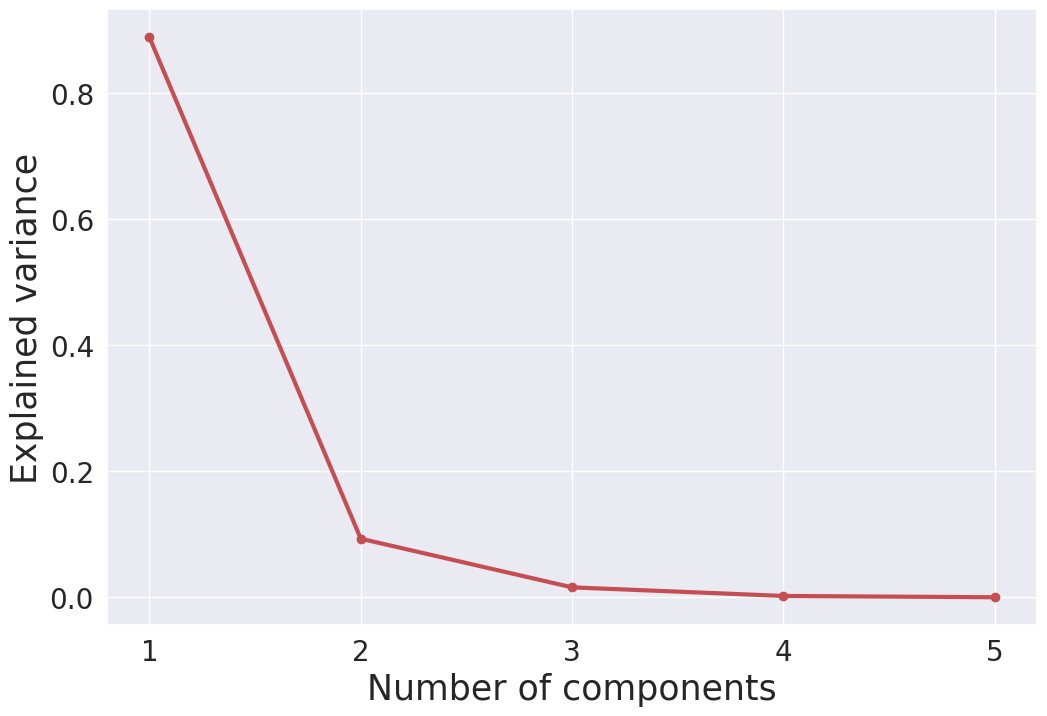

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0, size=20)
plt.yticks(size=20)
plt.xlabel('Number of components', size=25)
plt.ylabel('Explained variance', size=25)
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

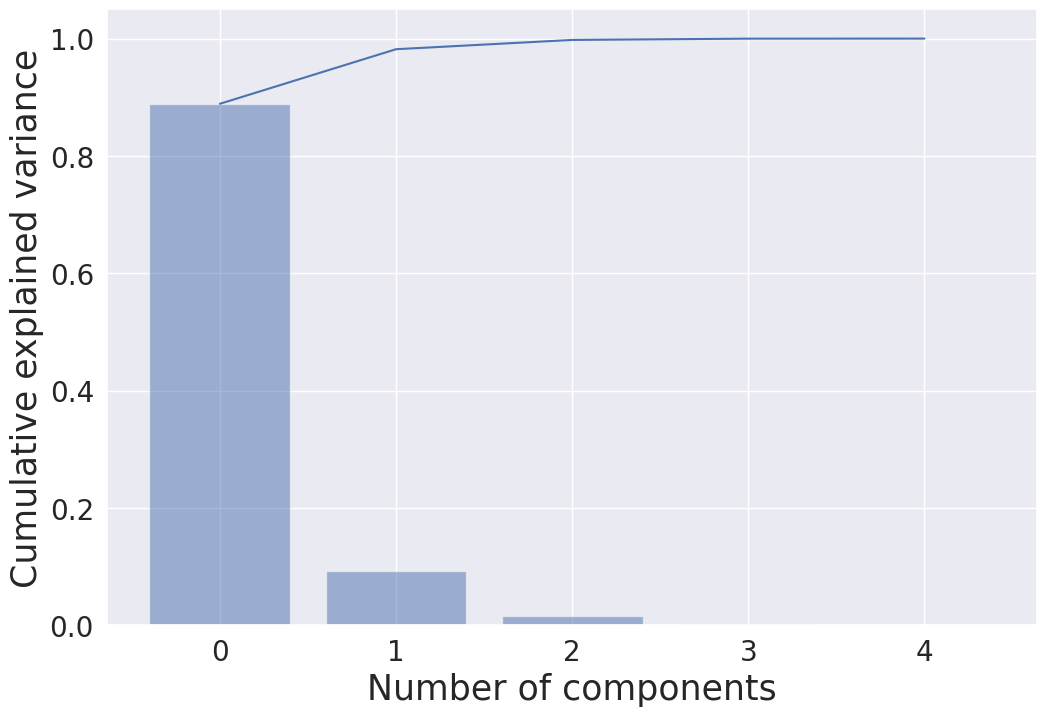

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Number of components', size=25)
plt.ylabel('Cumulative explained variance', size=25)

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (88.9%)',
 '1': 'PC 2 (9.3%)',
 '2': 'PC 3 (1.6%)',
 '3': 'PC 4 (0.2%)',
 '4': 'PC 5 (0.0%)'}

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('$Z_1$', size=25)
plt.ylabel('$Z_2$', size=25)
for i in range(len(A1)):
    # arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
    if variables[i] == 'CONVEX_AREA':
        plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*1.9, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'EQDIASQ':
        plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*0., variables[i], color='k', size=20)
        continue
    elif variables[i] == 'PERIMETER':
        plt.text(A1[i]*max(Z1)*1.75, A2[i]*max(Z2)*1.9, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'MAJOR_AXIS':
        plt.text(A1[i]*max(Z1)*1.85, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)
        continue
    elif variables[i] == 'SOLIDITY':
        plt.text(A1[i]*max(Z1)*1.1, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)
        continue

    plt.text(A1[i]*max(Z1)*1.6, A2[i]*max(Z2)*1.1, variables[i], color='k', size=20)

plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='r', label='Sukkary (0)')
plt.scatter(Z[idx_Ruthana,0], Z[idx_Ruthana,1], c='g', label='Ruthana (1)')
plt.scatter(Z[idx_Safawi,0], Z[idx_Safawi,1], c='b', label='Safawi (2)')
plt.legend(loc='upper right', fontsize=20)

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
print(out['topfeat'])

    PC     feature   loading  type
0  PC1   PERIMETER -0.470907  best
1  PC2       Class  0.746674  best
2  PC1  MAJOR_AXIS -0.462703  weak
3  PC2  MINOR_AXIS -0.596113  weak
4  PC1     EQDIASQ -0.468430  weak


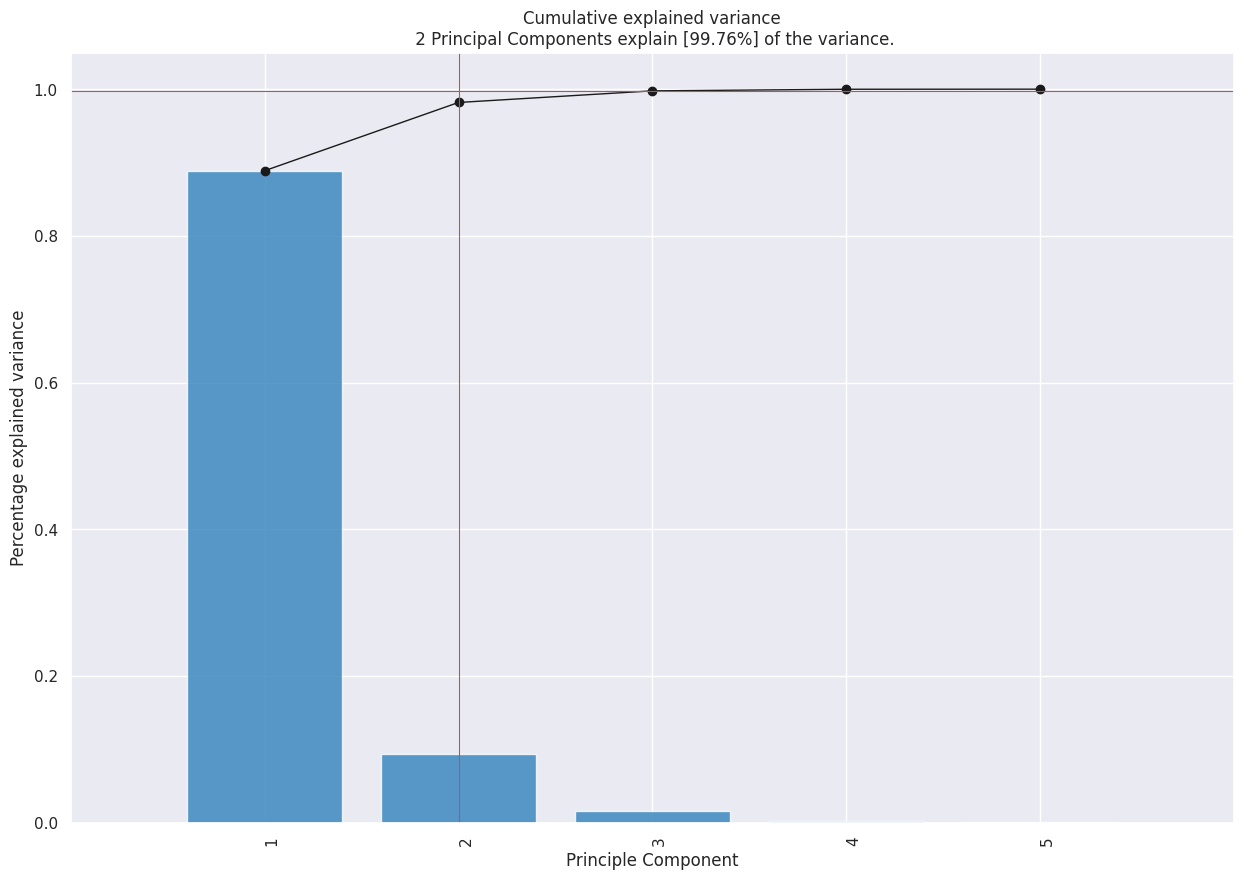

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


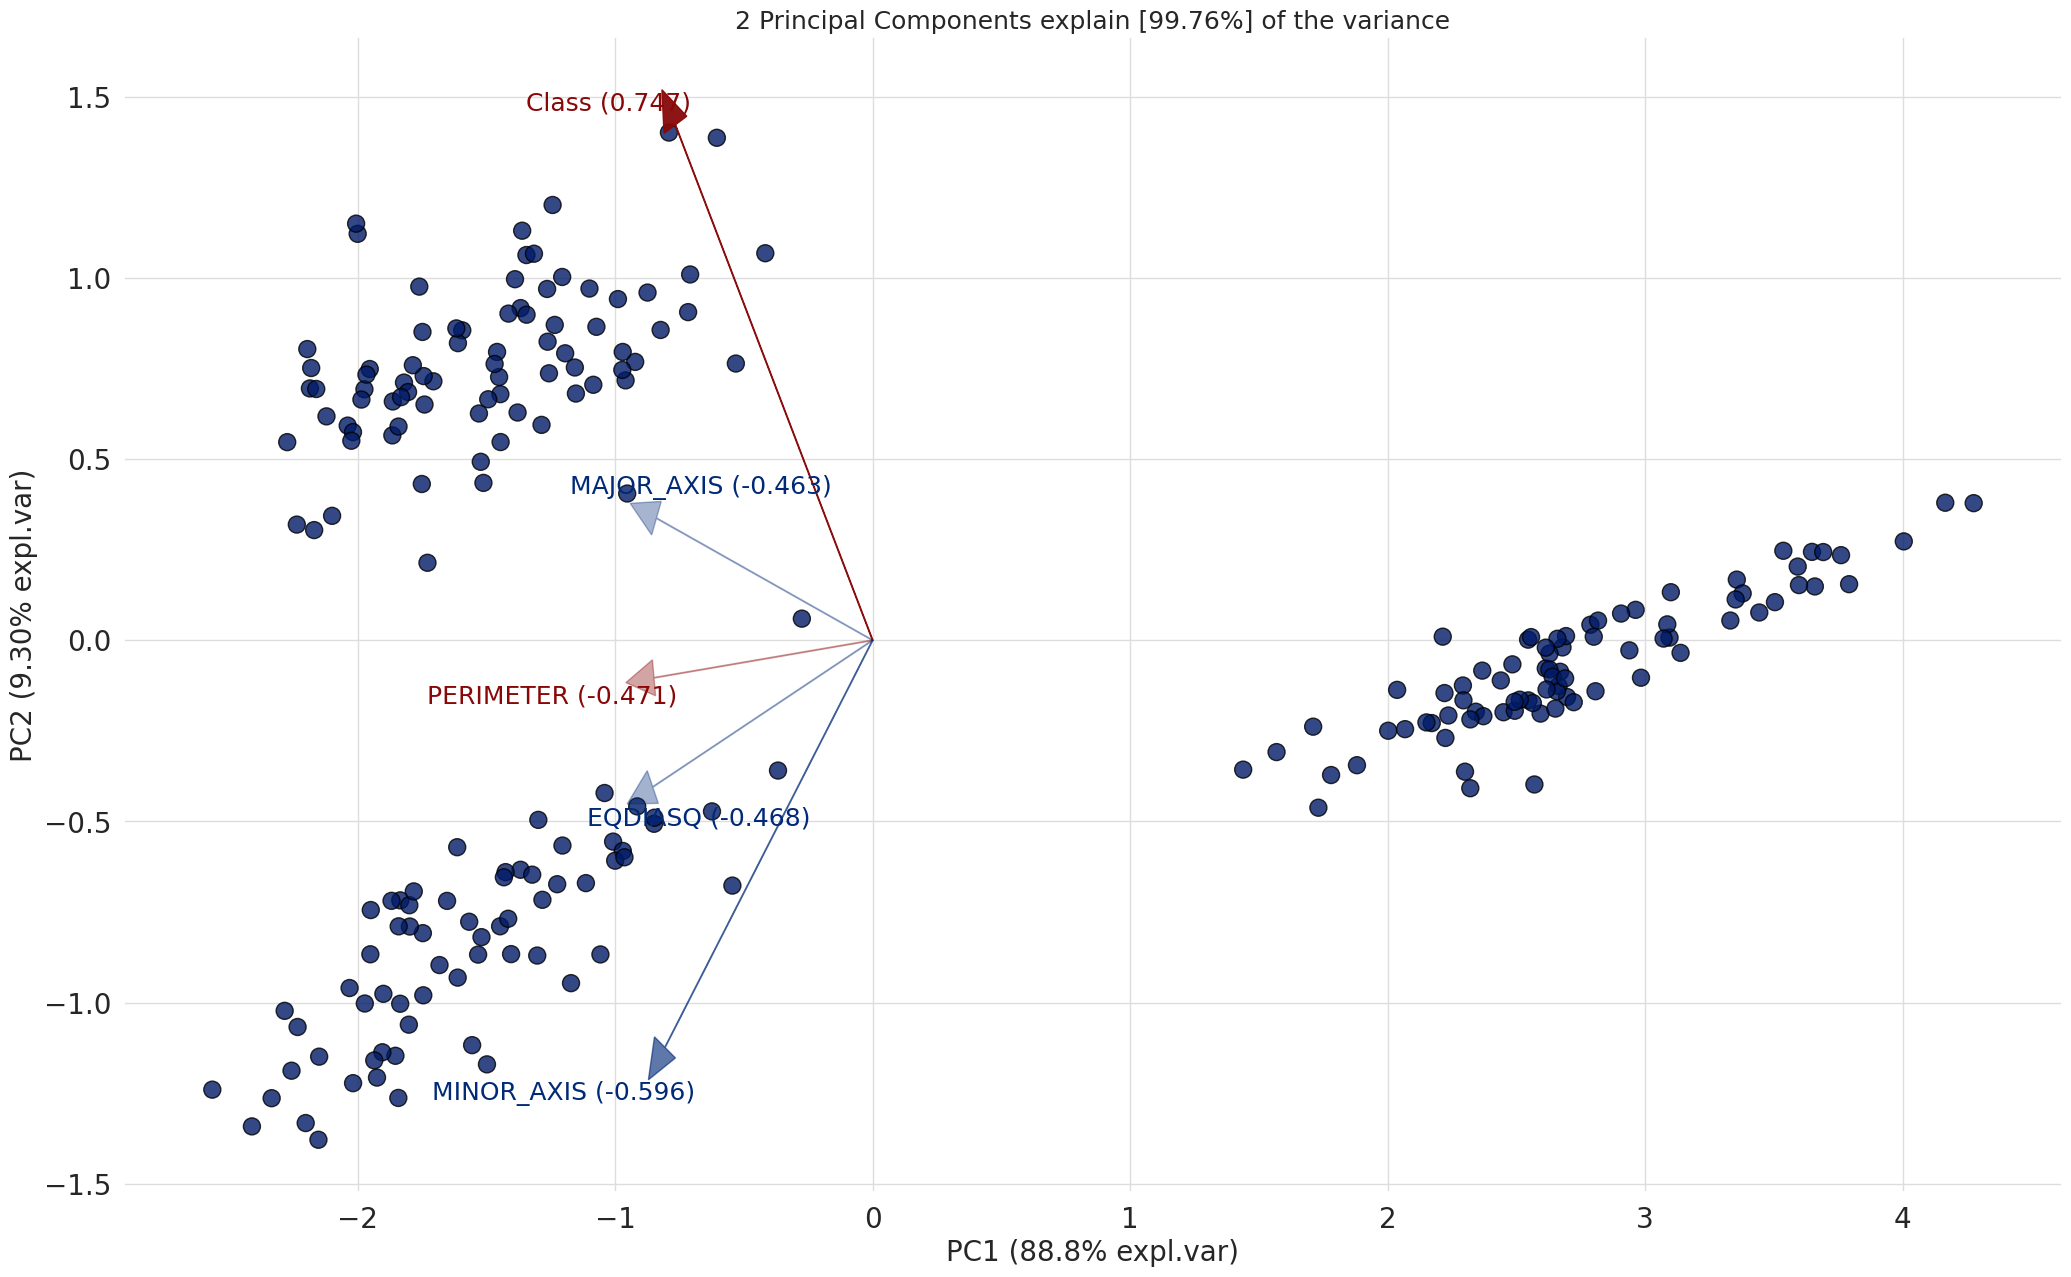

In [ ]:
ax = model.biplot(label=False, legend=False)

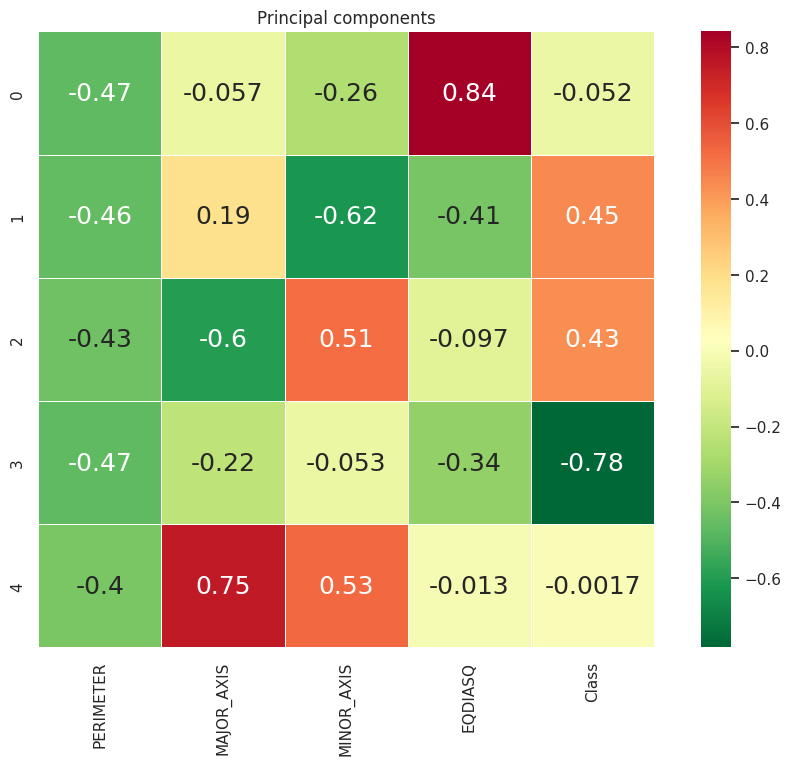

PC1:[-0.47090741 -0.46270263 -0.42785531 -0.46842956 -0.40207719]
PC2:[-0.0574339   0.18570721 -0.5961133  -0.22212841  0.74667401]


In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
# ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

In [ ]:
y = datefruit['Class']
X = df.iloc[:,0:7]
X.describe().transpose()
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.describe().transpose()
observations = list(df.index)
variables = list(df.columns)

In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 158
Test Dataset Size: 68


In [ ]:
!pip install pycaret
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.4 MB/s eta 0:00:00


In [ ]:
from pycaret.utils import version
version()

'3.3.1'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X = datefruit.drop(columns=['Class'])
X.head(10)

,PERIMETER,MAJOR_AXIS,MINOR_AXIS,EQDIASQ
0,1427.5811,515.6693,354.6234,427.2253
1,1671.4170,615.8516,403.3667,497.3849
2,1503.5980,546.4366,361.8018,443.1601
3,1463.5551,544.9724,361.5594,443.4745
4,1403.3560,542.0650,326.1642,419.5720
5,1467.7220,573.7374,333.2054,436.7935
6,1569.0680,587.9650,367.5672,464.0740
7,1530.7870,564.7152,362.0923,451.0723
8,1487.1000,534.5702,393.8198,457.7480
9,1426.8580,535.9053,345.1051,429.6369


In [ ]:
out['PC']

,PC1,PC2
0,2.696721,-0.156573
1,1.730977,-0.462116
2,2.449882,-0.198598
3,2.493741,-0.194559
4,2.787251,0.042813
...,...,...
221,-1.378831,0.628602
222,-0.874216,0.959703
223,-1.785609,0.759162
224,-2.024485,0.550707


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.76%] of the variance'}, xlabel='PC1 (88.8% expl.var)', ylabel='PC2 (9.30% expl.var)'>)

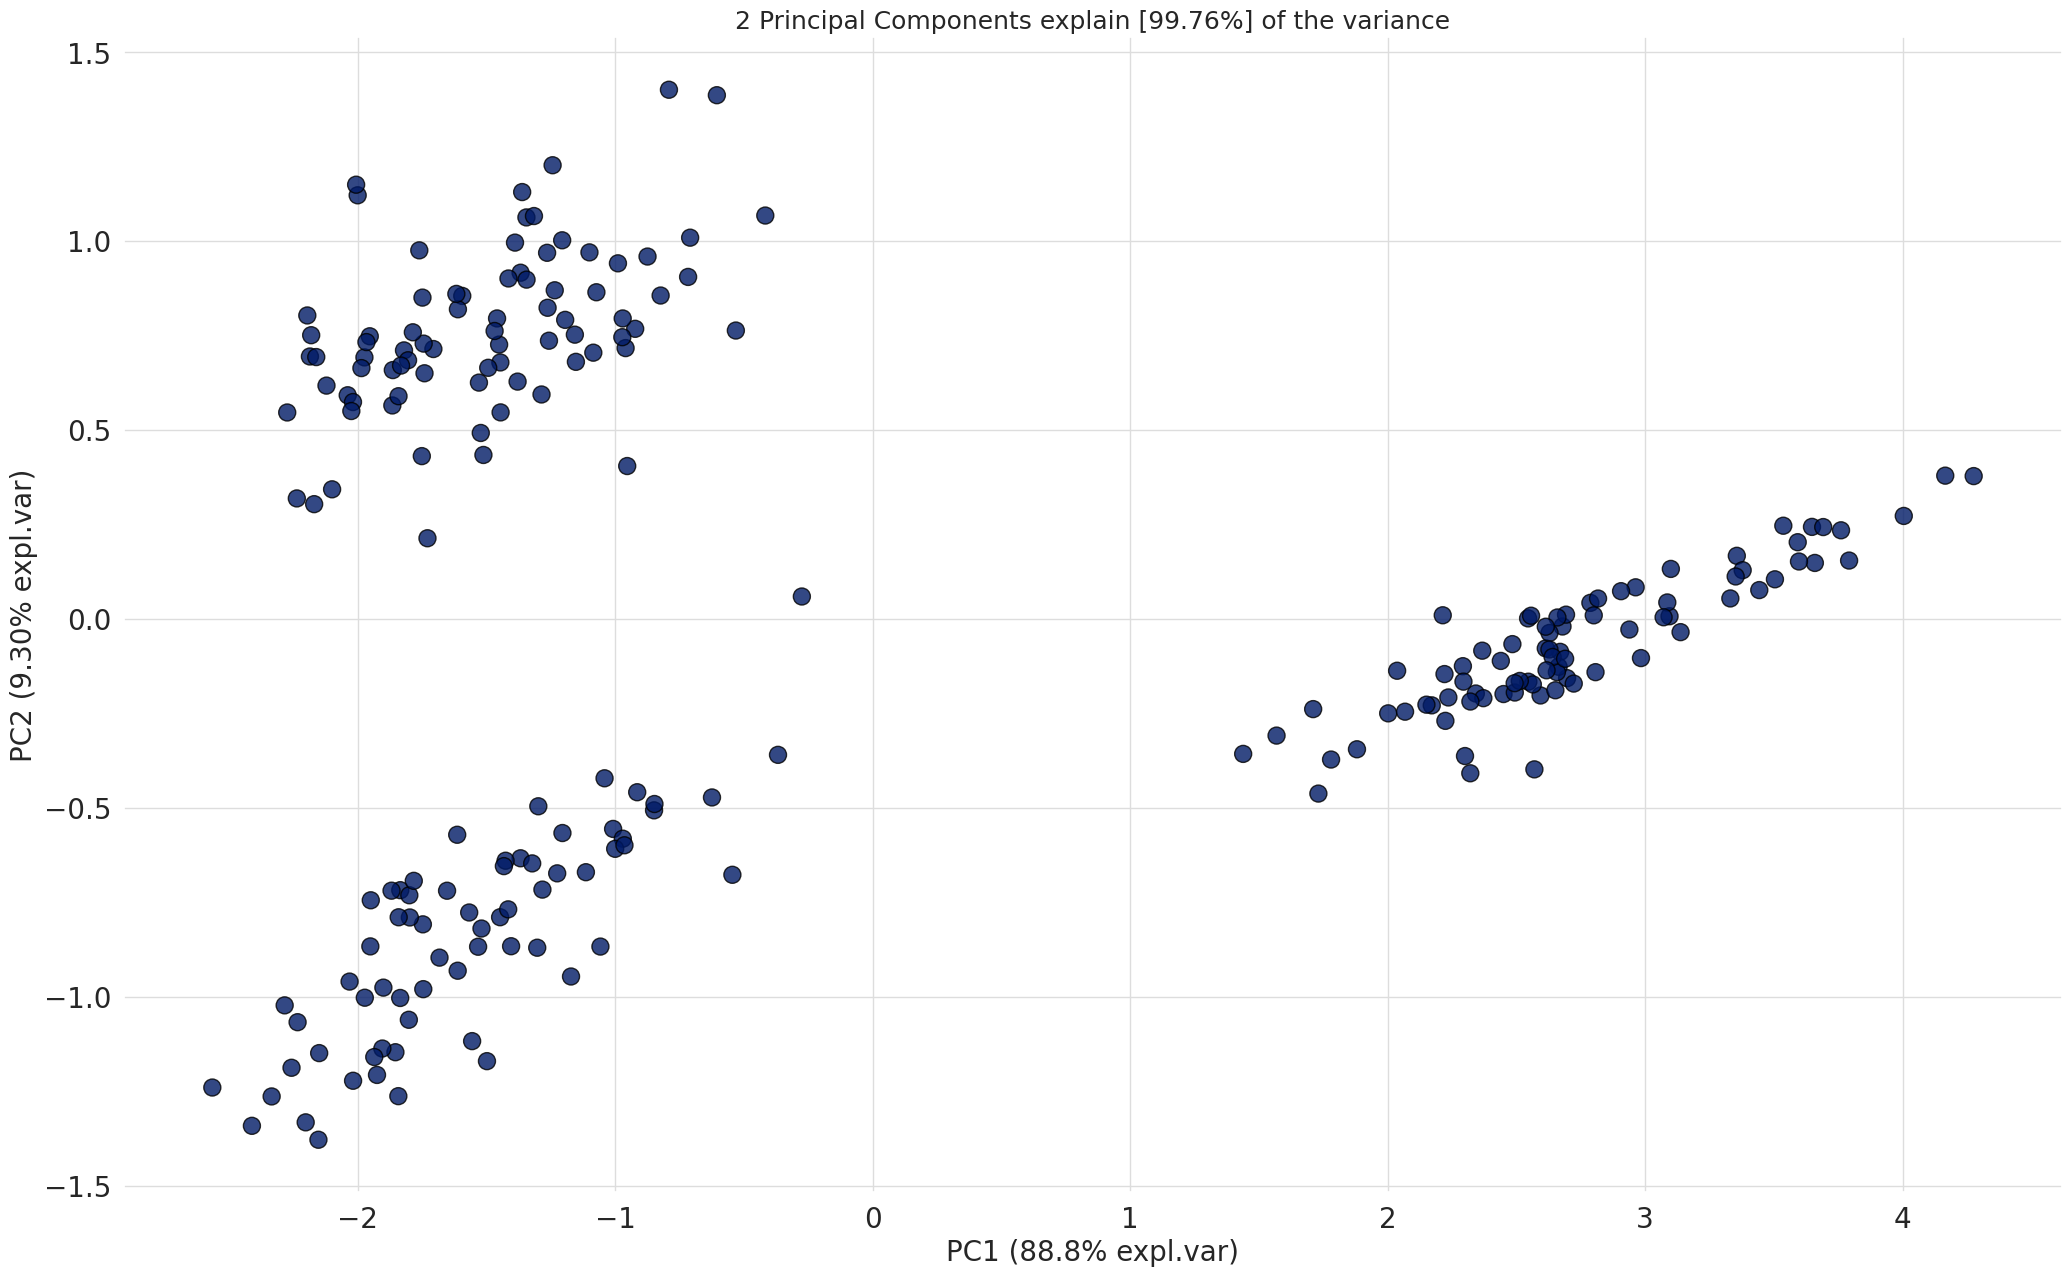

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T

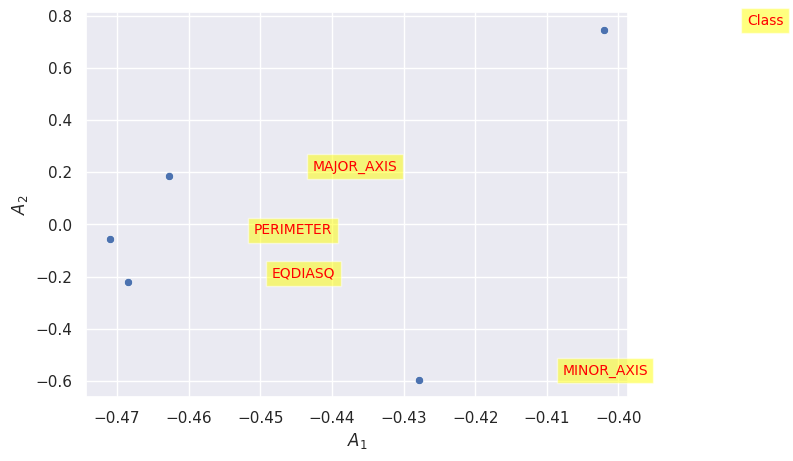

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
    if variables[i] == 'CONVEX_AREA':
        plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.08, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
        continue
    plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

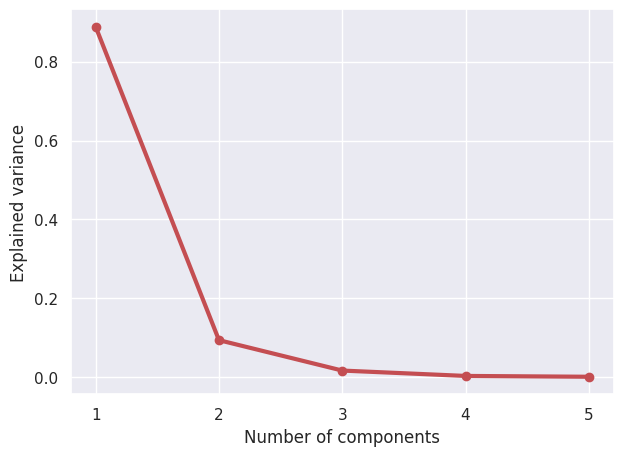

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [ ]:
from pycaret.utils import version
version()

'3.3.1'

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (203, 5)
Unseen Data For Predictions: (23, 5)


In [ ]:
from pycaret.classification import *
clf = setup(data=datefruit, target='Class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(226, 5)"
4,Transformed data shape,"(226, 5)"
5,Transformed train set shape,"(158, 5)"
6,Transformed test set shape,"(68, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9804,0.0000,0.9804,0.9840,0.9803,0.9704,0.9721,0.0890
nb,Naive Bayes,0.9746,0.9948,0.9746,0.9785,0.9740,0.9613,0.9635,0.1370
et,Extra Trees Classifier,0.9742,0.9987,0.9742,0.9765,0.9742,0.9609,0.9620,0.4010
lr,Logistic Regression,0.9738,0.0000,0.9738,0.9788,0.9736,0.9606,0.9631,1.6590
qda,Quadratic Discriminant Analysis,0.9738,0.0000,0.9738,0.9808,0.9739,0.9609,0.9642,0.1090
knn,K Neighbors Classifier,0.9683,0.9923,0.9683,0.9714,0.9680,0.9519,0.9536,0.1590
dt,Decision Tree Classifier,0.9679,0.9766,0.9679,0.9712,0.9679,0.9515,0.9531,0.1270
rf,Random Forest Classifier,0.9679,0.9983,0.9679,0.9712,0.9679,0.9515,0.9531,0.4460
ridge,Ridge Classifier,0.9675,0.0000,0.9675,0.9756,0.9676,0.9514,0.9553,0.0670
xgboost,Extreme Gradient Boosting,0.9675,0.9902,0.9675,0.9694,0.9668,0.9510,0.9525,0.1010


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.9583,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9375,0.9545,0.9375,0.9479,0.9369,0.9059,0.9113
6,0.9375,0.9545,0.9375,0.9479,0.9369,0.9059,0.9113
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.9443,0.9375,0.9464,0.9354,0.9036,0.9092
1,0.9375,0.9828,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9375,0.9830,0.9375,0.9479,0.9369,0.9059,0.9113
6,0.9375,0.9943,0.9375,0.9479,0.9369,0.9059,0.9113
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9333,0.9933,0.9333,0.9467,0.9340,0.9000,0.9061


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8750,0.9885,0.8750,0.8750,0.8750,0.8095,0.8095
2,0.9375,0.9545,0.9375,0.9479,0.9369,0.9059,0.9113
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9375,1.0000,0.9375,0.9479,0.9369,0.9059,0.9113
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,1.0000,0.9375,0.9500,0.9381,0.9059,0.9113
2,0.9375,0.9545,0.9375,0.9479,0.9369,0.9059,0.9113
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9375,0.9545,0.9375,0.9479,0.9369,0.9059,0.9113
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9333,1.0000,0.9333,0.9467,0.9340,0.9000,0.9061


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.0000,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9375,0.0000,0.9375,0.9500,0.9381,0.9059,0.9113
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.2, solver='eigen',
                           store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…